In [1]:
import numpy as np
import time

In [2]:
def clock(f):
    def ret(*args, **kwargs):
        start = time.time()
        val = f(*args, **kwargs)
        end = time.time()
        return val, end - start
    return ret

In [3]:
@clock
def test1(a, b):
    a2 = set(a)
    b2 = set(b)
    return list(set.intersection(a2, b2))

In [4]:
test1([1,2,3], [3,4])

([3], 3.0994415283203125e-06)

In [90]:
times = []
for _ in range(10):
    for n in np.linspace(2, 7, 10):
        x = int(np.power(10, n))
        _, t = test1(range(x), range(x))
        times.append((x, t))

In [91]:
times

[(100, 1.621246337890625e-05),
 (359, 2.4080276489257812e-05),
 (1291, 0.0003209114074707031),
 (4641, 0.00037598609924316406),
 (16681, 0.001814126968383789),
 (59948, 0.006801128387451172),
 (215443, 0.03313112258911133),
 (774263, 0.15571212768554688),
 (2782559, 0.6049847602844238),
 (10000000, 1.7199029922485352),
 (100, 1.5974044799804688e-05),
 (359, 2.5033950805664062e-05),
 (1291, 0.0003440380096435547),
 (4641, 0.0003421306610107422),
 (16681, 0.0018031597137451172),
 (59948, 0.006997108459472656),
 (215443, 0.031203031539916992),
 (774263, 0.14743566513061523),
 (2782559, 0.6064853668212891),
 (10000000, 1.7344470024108887),
 (100, 1.6927719116210938e-05),
 (359, 2.5987625122070312e-05),
 (1291, 0.00033211708068847656),
 (4641, 0.00034928321838378906),
 (16681, 0.0017180442810058594),
 (59948, 0.006625175476074219),
 (215443, 0.029460906982421875),
 (774263, 0.14785504341125488),
 (2782559, 0.6139671802520752),
 (10000000, 1.7137799263000488),
 (100, 1.5974044799804688e-05),

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
df = pd.DataFrame(times)
df.columns = ["x", "time"]
df["log_x"] = np.log(df.x)
df["log_time"] = np.log(df.time)

<AxesSubplot:xlabel='log_x', ylabel='log_time'>

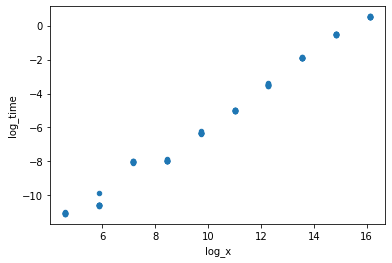

In [97]:
df.plot("log_x", "log_time", "scatter")

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df.log_x.values.reshape((-1, 1)), df.log_time)
model.coef_, model.intercept_

(array([1.04069945]), -16.208882547301524)

pythonのset.intersectionは線形時間で計算できるぽい